# Effects of Borrower's Background on Interest Rate and Loan Outcomes
## by Qilin Zhang

## Investigation Overview

In this investigation, I wanted to figure out what factors affect a loan’s outcome status, and what affects the borrower interest rate in the dataset. I focued on income range, credit score, prosper rating, loan amount and loan term.

## Dataset Overview

This dataset includes approximately 114,000 loan records with 21 variables regarding loans' and borrowers' characteristics. 1929 pieces were removed from the analysis due to inconsistencies or missing information and 112,008 records left.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleaned_loans.csv')

In [3]:
# convert ProsperRating and IncomeRange into ordered categorical types
prosper_type = CategoricalDtype(categories=['HR','E','D','C','B','A','AA'], ordered=True)
df['ProsperRating'] = df['ProsperRating'].astype(prosper_type)

income_type = CategoricalDtype(categories=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed'], ordered=True)
df['IncomeRange'] = df['IncomeRange'].astype(income_type)

In [4]:
# Set seaborn in single color. Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

## Loan Outcome Status
Nearly 50% of the loans in the dataset are still in process. 35.5% are completed loans and 14.8% are defaulted ones.

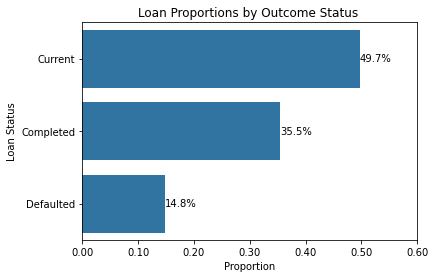

In [5]:
status_count = df.Status.value_counts()
# Get index of ordered series
status_order = status_count.index

# Returns the sum of all not-null values in `Status` column
n_loans = status_count.sum()

# Return the highest frequency in the `Status` column
max_loan_count = status_count[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_loan_prop = max_loan_count / n_loans

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
tick_props = np.arange(0, max_loan_prop+0.2, 0.1)
# Set tick labels. 
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Set seaborn in single color. Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

# Plot the proportions
sns.countplot(data=df,y='Status', color=base_color,order=status_order);
plt.xticks(tick_props * n_loans, tick_names)
plt.ylabel('Loan Status')
plt.xlabel('Proportion')
plt.title('Loan Proportions by Outcome Status ');

# Logic to print the proportion text on the bars
for i in range (status_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = status_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

## Distributions of Borrower Interest Rate and Loan Amount
The distribution of borrower interest rate is almost normally distributed. Most of the interest rate range from 10% to 32%. Regarding the loan amount, most of the loans are between 2,000 and 15,000 dollars.

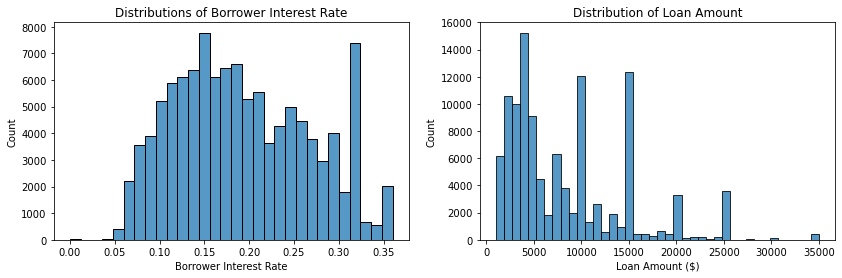

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=[14,4])
sns.histplot(df['BorrowerRate'],ax = ax[0],bins=30);
ax[0].set_title('Distributions of Borrower Interest Rate')
ax[0].set_xlabel('Borrower Interest Rate')
ax[0].set_yticklabels([],minor = True)

sns.histplot(df['LoanOriginalAmount'],bins=40);
ax[1].set_title('Distribution of Loan Amount')
ax[1].set_xlabel('Loan Amount ($)')
ax[1].set_yticklabels([],minor = True);

## Loan Categories

51.4% of the loans were for Debt consolidation. Other top loan purposes are home improvement and business.

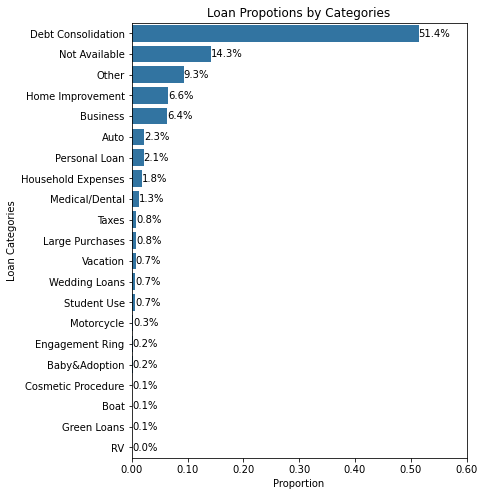

In [7]:
category_count = df.ListingCategory.value_counts()
# Get index of ordered series
category_order = category_count.index

# Returns the sum of all not-null values in category column
n_loans = category_count.sum()

# Return the highest frequency in the category column
max_category_count = category_count[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_category_prop = max_category_count / n_loans

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
tick_props = np.arange(0, max_category_prop+0.1, 0.1)

# Set tick labels. 
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.figure(figsize = [6, 8]) 

# Plot the proportions
sns.countplot(data=df,y='ListingCategory', color=base_color,order=category_order);
plt.xticks(tick_props * n_loans, tick_names)
plt.xlabel('Proportion')
plt.ylabel('Loan Categories')
plt.title('Loan Propotions by Categories');

# Logic to print the proportion text on the bars
for i in range (category_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `ListingCategory` column in decreasing order.
    count = category_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

## Loan’s Defaulted Rate vs. Credit Score and Prosper Rating

Defaulted Rate is defined as the ratio between defaults and total number of loans that are not in process. Genrally, the higher the credit score is, the lower the defaulted rate. Similar pattern is also find in the relationship between defaulted rate and Prosper rating.

In [8]:
# Generate a new dataframe only include data either completed or defaulted
df_status = df[df['Status']!='Current']

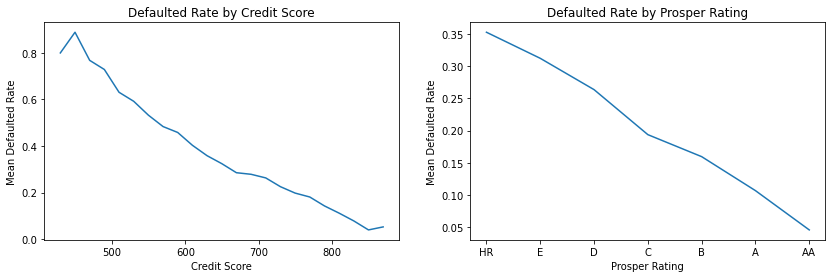

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=[14,4])

# generate data of 'Status', 'CreditScore'
credit_defaulted = df_status.groupby(['Status', 'CreditScore'])['Status'].count().unstack(0)

credit_defaulted_rate = (credit_defaulted['Defaulted'] / (credit_defaulted['Defaulted'] + credit_defaulted['Completed']))
credit_defaulted_rate.plot(ax = ax[0]);
ax[0].set_title('Defaulted Rate by Credit Score')
ax[0].set_ylabel('Mean Defaulted Rate')
ax[0].set_xlabel('Credit Score')
ax[0].set_yticklabels([],minor = True)

# generate data of 'Status', 'ProsperRating'
prosper_defaulted = df_status.groupby(['Status', 'ProsperRating'])['Status'].count().unstack(0)

prosper_defaulted_rate = (prosper_defaulted['Defaulted'] / (prosper_defaulted['Defaulted'] + prosper_defaulted['Completed']))
prosper_defaulted_rate.plot(ax = ax[1]);
ax[1].set_title('Defaulted Rate by Prosper Rating')
ax[1].set_ylabel('Mean Defaulted Rate')
ax[1].set_xlabel('Prosper Rating')
ax[1].set_yticklabels([],minor = True);

## Borrower Rate and Loan Amount by Prosper Rating and Loan Term
Loan term strengthened the relationship between Prosper rating and borrow rate, as well as the relationship between Prosper rating and loan amount. People with higher Prosper rating could get higher amount of loan for longer term compared to those with low Prosper rating. Specifically, for long term loans (36 or 60 months), people with higher Prosper rating could have lower rate for longer loan term. 

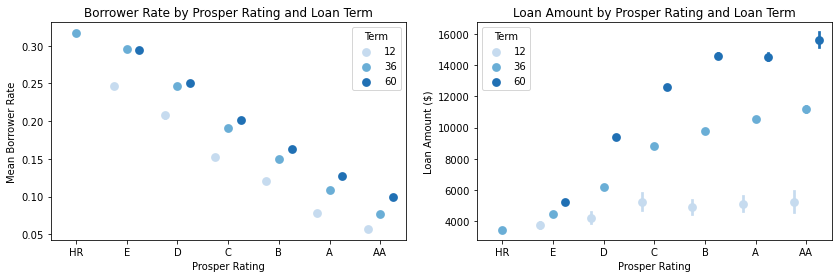

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=[14,4])

sns.pointplot(data = df, x = 'ProsperRating', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[0])
ax[0].set_title('Borrower Rate by Prosper Rating and Loan Term')
ax[0].set_ylabel('Mean Borrower Rate')
ax[0].set_xlabel('Prosper Rating')
ax[0].set_yticklabels([],minor = True)

sns.pointplot(data = df, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[1]);

ax[1].set_title('Loan Amount by Prosper Rating and Loan Term')
ax[1].set_ylabel('Loan Amount ($)')
ax[1].set_xlabel('Prosper Rating')
ax[1].set_yticklabels([],minor = True)

plt.show();

In [ ]:
!jupyter nbconvert Loan_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Loan_slide_deck.ipynb to slides
[NbConvertApp] Writing 719919 bytes to Loan_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Loan_slide_deck.slides.html
Use Control-C to stop this server
